In [409]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from math import ceil

import warnings
warnings.filterwarnings("ignore")

from sklearn.manifold import TSNE

In [255]:
df_train = pd.read_csv("df_train_processed.csv")

In [256]:
df_train = df_train.drop(columns=['actor'])

In [257]:
df_train_num = df_train.select_dtypes(include="number")

## Standardization

In [258]:
scaler = MinMaxScaler()
df_train_num_scal = scaler.fit_transform(df_train_num)
df_train_num = pd.DataFrame(df_train_num_scal, columns=df_train_num.columns)

In [259]:
def add_target_column(df1, df2, target):
    
    df2[target] = df1[target]
    
    return df2

In [260]:
def lablel_encoder(data, target):
    
    label_encoder = preprocessing.LabelEncoder()
    
    data[target]= label_encoder.fit_transform(data[target])
    
    return data

In [261]:
df_emotional_intensity_train = add_target_column(df_train, df_train_num, 'emotional_intensity')

In [262]:
label_encoder = lablel_encoder(df_emotional_intensity_train, 'emotional_intensity')

In [264]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1") #,markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')
        
        

In [265]:
def perform_tsne_reduced(X_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        
    return {'X_reduced':X_reduced}

## Rendere training dataset imbalanced


In [266]:
def dip_indp_variables(data,target):
    
    X = np.array(data.loc[:, data.columns != target])
    
    y = np.array(data.loc[:, data.columns == target])
    
    result = np.unique(y, return_counts=True)
    
    return  {'X': X,
             'y': y,
             'result': { result[0][0] : result[1][0],
                       result[0][1] : result[1][1]}
           }

In [267]:
dip_indp_variables_train = dip_indp_variables(df_emotional_intensity_train,"emotional_intensity")

In [268]:
X = np.array(dip_indp_variables_train['X'])
y = np.array(dip_indp_variables_train['y'].ravel())

## Grafico di emotional_intensity prima di fare lo sbilanciamento


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 1828 samples in 0.001s...
[t-SNE] Computed neighbors for 1828 samples in 0.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1828
[t-SNE] Computed conditional probabilities for sample 1828 / 1828
[t-SNE] Mean sigma: 0.344916
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 102.9677429, gradient norm = 0.2842458 (50 iterations in 0.278s)
[t-SNE] Iteration 100: error = 91.4617310, gradient norm = 0.2247303 (50 iterations in 0.212s)
[t-SNE] Iteration 150: error = 86.4116669, gradient norm = 0.2222018 (50 iterations in 0.188s)
[t-SNE] Iteration 200: error = 83.4945831, gradient norm = 0.1992435 (50 iterations in 0.198s)
[t-SNE] Iteration 250: error = 81.6202545, gradient norm = 0.1928188 (50 iterations in 0.195s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.620255
[t-SNE] Iteration 300: err

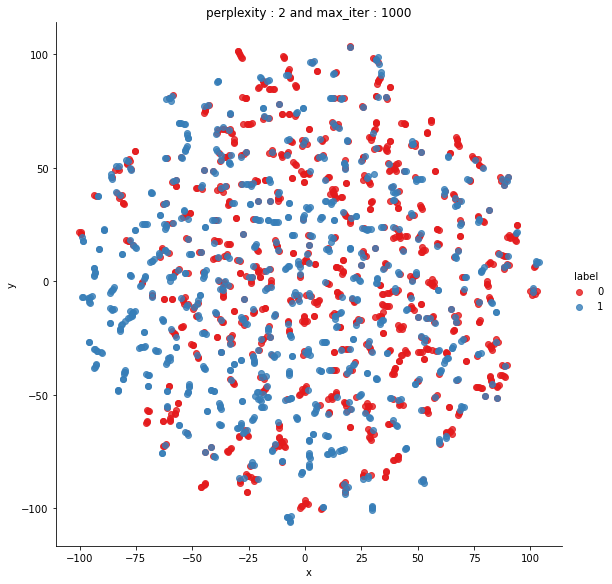

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1828 samples in 0.000s...
[t-SNE] Computed neighbors for 1828 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1828
[t-SNE] Computed conditional probabilities for sample 1828 / 1828
[t-SNE] Mean sigma: 0.558759
[t-SNE] Computed conditional probabilities in 0.011s
[t-SNE] Iteration 50: error = 94.8420334, gradient norm = 0.1889295 (50 iterations in 0.337s)
[t-SNE] Iteration 100: error = 83.5652237, gradient norm = 0.1241383 (50 iterations in 0.210s)
[t-SNE] Iteration 150: error = 81.0052490, gradient norm = 0.1065096 (50 iterations in 0.192s)
[t-SNE] Iteration 200: error = 80.0502472, gradient norm = 0.0777742 (50 iterations in 0.190s)
[t-SNE] Iteration 250: error = 79.5890198, gradient norm = 0.0826127 (50 iterations in 0.198s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.589020
[t-SNE] Iteration 300

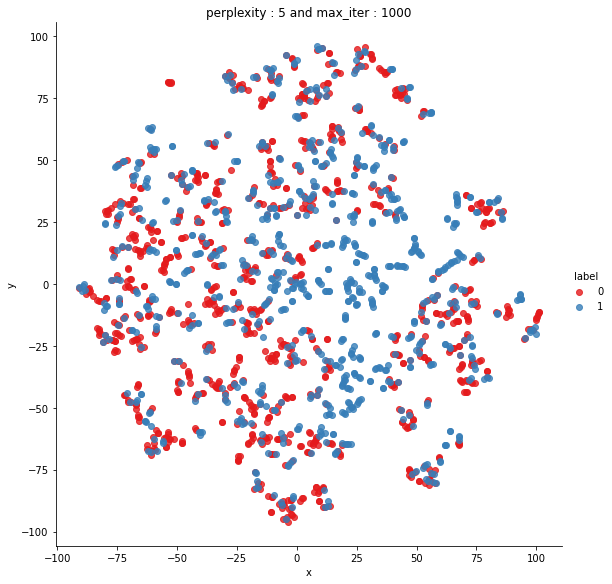

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1828 samples in 0.001s...
[t-SNE] Computed neighbors for 1828 samples in 0.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1828
[t-SNE] Computed conditional probabilities for sample 1828 / 1828
[t-SNE] Mean sigma: 0.679331
[t-SNE] Computed conditional probabilities in 0.018s
[t-SNE] Iteration 50: error = 86.9827576, gradient norm = 0.1662031 (50 iterations in 0.328s)
[t-SNE] Iteration 100: error = 78.7843170, gradient norm = 0.0811417 (50 iterations in 0.234s)
[t-SNE] Iteration 150: error = 77.7170715, gradient norm = 0.0604380 (50 iterations in 0.221s)
[t-SNE] Iteration 200: error = 77.1855469, gradient norm = 0.0451040 (50 iterations in 0.230s)
[t-SNE] Iteration 250: error = 77.0698166, gradient norm = 0.0381971 (50 iterations in 0.218s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.069817
[t-SNE] Iteration 30

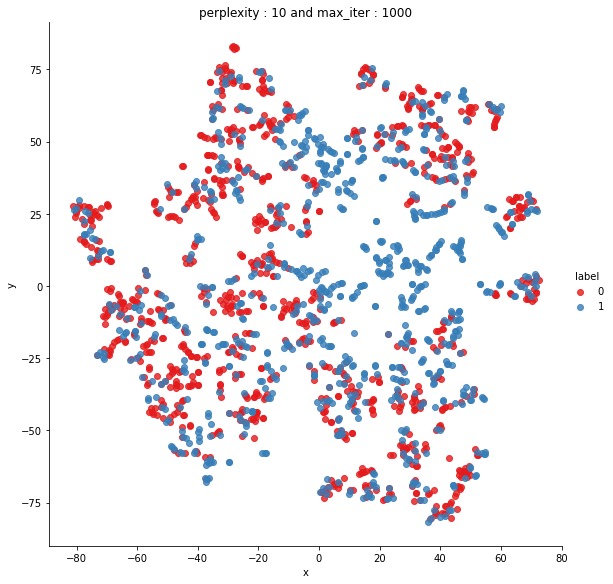

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1828 samples in 0.001s...
[t-SNE] Computed neighbors for 1828 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1828
[t-SNE] Computed conditional probabilities for sample 1828 / 1828
[t-SNE] Mean sigma: 0.787489
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 80.9632263, gradient norm = 0.1003302 (50 iterations in 0.512s)
[t-SNE] Iteration 100: error = 75.0743713, gradient norm = 0.0667900 (50 iterations in 0.333s)
[t-SNE] Iteration 150: error = 73.2805634, gradient norm = 0.0243845 (50 iterations in 0.338s)
[t-SNE] Iteration 200: error = 73.0603485, gradient norm = 0.0270704 (50 iterations in 0.333s)
[t-SNE] Iteration 250: error = 73.0555954, gradient norm = 0.0286723 (50 iterations in 0.318s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.055595
[t-SNE] Iteration 30

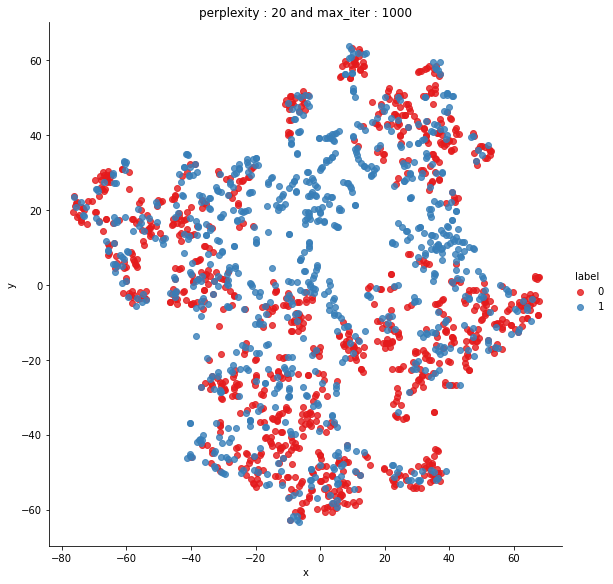

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1828 samples in 0.001s...
[t-SNE] Computed neighbors for 1828 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1828
[t-SNE] Computed conditional probabilities for sample 1828 / 1828
[t-SNE] Mean sigma: 0.929949
[t-SNE] Computed conditional probabilities in 0.108s
[t-SNE] Iteration 50: error = 70.8485260, gradient norm = 0.0416685 (50 iterations in 0.749s)
[t-SNE] Iteration 100: error = 67.2111969, gradient norm = 0.0239174 (50 iterations in 0.660s)
[t-SNE] Iteration 150: error = 66.9503403, gradient norm = 0.0195959 (50 iterations in 0.569s)
[t-SNE] Iteration 200: error = 66.9474716, gradient norm = 0.0222820 (50 iterations in 0.567s)
[t-SNE] Iteration 250: error = 66.9478302, gradient norm = 0.0243587 (50 iterations in 0.549s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.947830
[t-SNE] Iteration 3

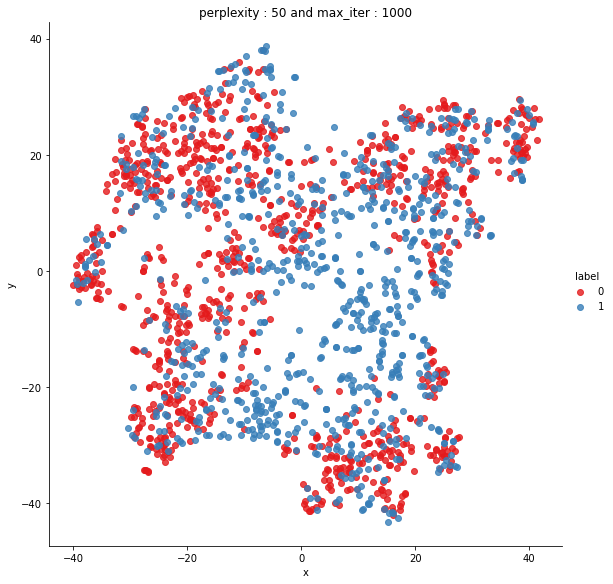

Done


In [269]:
perform_tsne(X,y,perplexities =[2,5,10,20,50])

In [270]:
dip_indp_variables_train['result']

{0: 984, 1: 844}

In [271]:
def rows_to_remove(data,target,num, dataset):
    
    y = dataset['y']
    
    majority_class = list(dataset['result'].keys())[0]
    
    total_majority_class = dataset['result'][majority_class]
    
    np.random.seed(42)
    
    rows_remove = np.random.choice((data[y == majority_class]).index, total_majority_class-num, replace=False)
    
    df_target = data.drop(index=rows_remove, axis=0)
    
    return {'df_target': df_target,
            'rows_remove': rows_remove}

In [273]:
rows_remove_train = rows_to_remove(df_emotional_intensity_train,"emotional_intensity", 35, dip_indp_variables_train)

In [274]:
def drop_rows(data, rows_dataset):
    
    df_after_remove = data.drop(index=rows_dataset['rows_remove'], axis=0)
    
    return {'df_after_remove': df_after_remove}

In [275]:
drop_rows_train = drop_rows(df_emotional_intensity_train, rows_remove_train)

In [276]:
def dip_indip_after_remove(data, target, rows, dip_indp_variables_dataset):
    
    X2 = data.loc[:, data.columns != target]
    
    y2 = np.array([dip_indp_variables_dataset['y'][i] for i in range(len(dip_indp_variables_dataset['y'])) if i not in rows])
    
    result = np.unique(y2, return_counts=True)
    
    return {'X2': X2,
            'y2': y2,
            'result': { result[0][0] : result[1][0],
                      result[0][1] : result[1][1]}
           }

In [277]:
dip_indip_after_remove_train = dip_indip_after_remove(drop_rows_train['df_after_remove'], 
                                                'sex',
                                                rows_remove_train['rows_remove'], dip_indp_variables_train)

In [278]:
X2 = np.array(dip_indip_after_remove_train['X2'])
y2 = np.array(dip_indip_after_remove_train['y2'].ravel())

In [279]:
X2_reduced = perform_tsne_reduced(X2,perplexities =[2,5,10,20,50])


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 879 samples in 0.001s...
[t-SNE] Computed neighbors for 879 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 879 / 879
[t-SNE] Mean sigma: 0.405639
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 99.7869720, gradient norm = 0.4728271 (50 iterations in 0.122s)
[t-SNE] Iteration 100: error = 91.8137665, gradient norm = 0.4607345 (50 iterations in 0.097s)
[t-SNE] Iteration 150: error = 88.9257431, gradient norm = 0.4524116 (50 iterations in 0.079s)
[t-SNE] Iteration 200: error = 85.4679260, gradient norm = 0.4594083 (50 iterations in 0.081s)
[t-SNE] Iteration 250: error = 83.5632706, gradient norm = 0.4711221 (50 iterations in 0.092s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.563271
[t-SNE] Iteration 300: error = 1.7997646, gradient norm = 0.0070404 (50 iterations in 0.076s)
[t-

[t-SNE] Iteration 450: error = 0.9529824, gradient norm = 0.0001602 (50 iterations in 0.114s)
[t-SNE] Iteration 500: error = 0.9471648, gradient norm = 0.0001382 (50 iterations in 0.116s)
[t-SNE] Iteration 550: error = 0.9439521, gradient norm = 0.0001115 (50 iterations in 0.137s)
[t-SNE] Iteration 600: error = 0.9410134, gradient norm = 0.0004056 (50 iterations in 0.110s)
[t-SNE] Iteration 650: error = 0.9386278, gradient norm = 0.0001048 (50 iterations in 0.113s)
[t-SNE] Iteration 700: error = 0.9370748, gradient norm = 0.0001074 (50 iterations in 0.117s)
[t-SNE] Iteration 750: error = 0.9362238, gradient norm = 0.0000810 (50 iterations in 0.117s)
[t-SNE] Iteration 800: error = 0.9354067, gradient norm = 0.0000950 (50 iterations in 0.115s)
[t-SNE] Iteration 850: error = 0.9345255, gradient norm = 0.0000970 (50 iterations in 0.114s)
[t-SNE] Iteration 900: error = 0.9333609, gradient norm = 0.0001919 (50 iterations in 0.116s)
[t-SNE] Iteration 950: error = 0.9325819, gradient norm = 0.

In [280]:
X2 = X2_reduced['X_reduced']

### Grafico di emotional_intensity con t-SNE dopo che è stato fatto lo sbilanciamento


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 879 samples in 0.001s...
[t-SNE] Computed neighbors for 879 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 879 / 879
[t-SNE] Mean sigma: 0.535422
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 98.1393356, gradient norm = 0.4668570 (50 iterations in 0.139s)
[t-SNE] Iteration 100: error = 89.4459076, gradient norm = 0.4575097 (50 iterations in 0.099s)
[t-SNE] Iteration 150: error = 86.0586014, gradient norm = 0.4444061 (50 iterations in 0.087s)
[t-SNE] Iteration 200: error = 80.0306396, gradient norm = 0.4635226 (50 iterations in 0.088s)
[t-SNE] Iteration 250: error = 77.9437256, gradient norm = 0.4653823 (50 iterations in 0.101s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.943726
[t-SNE] Iteration 300: error = 1.5243800, gradient norm = 0.0065011 (50 iterations in 0.089s)
[t-

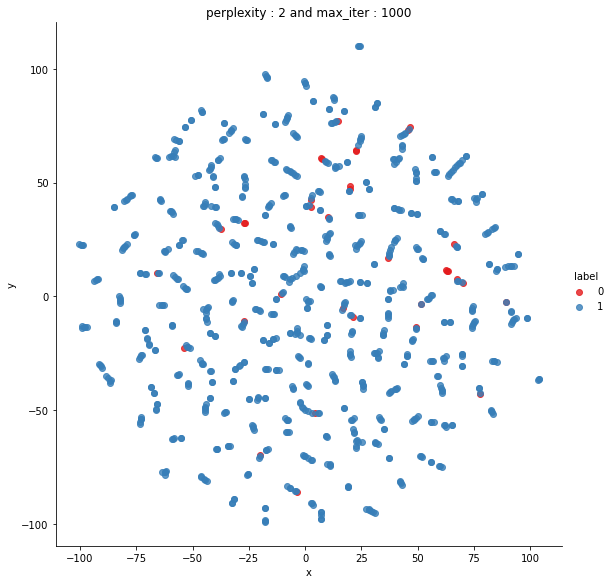

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 879 samples in 0.000s...
[t-SNE] Computed neighbors for 879 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 879 / 879
[t-SNE] Mean sigma: 1.117652
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 79.6161652, gradient norm = 0.4580272 (50 iterations in 0.141s)
[t-SNE] Iteration 100: error = 70.6537399, gradient norm = 0.4512247 (50 iterations in 0.119s)
[t-SNE] Iteration 150: error = 68.1417236, gradient norm = 0.4439995 (50 iterations in 0.112s)
[t-SNE] Iteration 200: error = 65.4143906, gradient norm = 0.4423479 (50 iterations in 0.122s)
[t-SNE] Iteration 250: error = 64.4248352, gradient norm = 0.4399196 (50 iterations in 0.112s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.424835
[t-SNE] Iteration 300: error = 1.0629628, gradient norm = 0.0025367 (50 iterations in 0.091

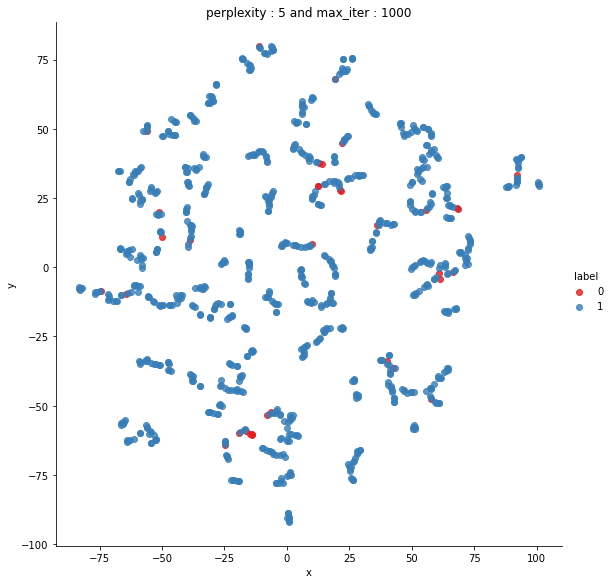

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 879 samples in 0.001s...
[t-SNE] Computed neighbors for 879 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 879 / 879
[t-SNE] Mean sigma: 1.657954
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 70.6050262, gradient norm = 0.3844990 (50 iterations in 0.151s)
[t-SNE] Iteration 100: error = 63.4609489, gradient norm = 0.3328654 (50 iterations in 0.121s)
[t-SNE] Iteration 150: error = 61.4374504, gradient norm = 0.3431620 (50 iterations in 0.119s)
[t-SNE] Iteration 200: error = 60.2082901, gradient norm = 0.3256422 (50 iterations in 0.111s)
[t-SNE] Iteration 250: error = 59.7899399, gradient norm = 0.3394002 (50 iterations in 0.100s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.789940
[t-SNE] Iteration 300: error = 0.7351366, gradient norm = 0.0011398 (50 iterations in 0.10

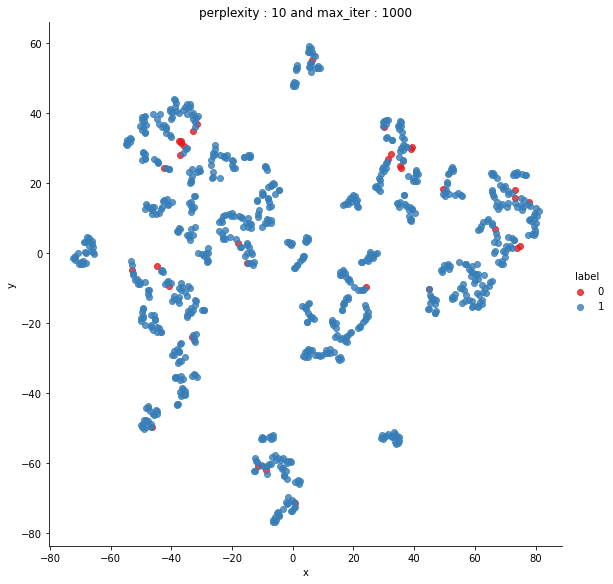

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 879 samples in 0.000s...
[t-SNE] Computed neighbors for 879 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 879 / 879
[t-SNE] Mean sigma: 2.431686
[t-SNE] Computed conditional probabilities in 0.018s
[t-SNE] Iteration 50: error = 63.9478378, gradient norm = 0.3169441 (50 iterations in 0.168s)
[t-SNE] Iteration 100: error = 60.0962219, gradient norm = 0.2744360 (50 iterations in 0.146s)
[t-SNE] Iteration 150: error = 58.9935226, gradient norm = 0.2764398 (50 iterations in 0.137s)
[t-SNE] Iteration 200: error = 57.7686081, gradient norm = 0.2661735 (50 iterations in 0.153s)
[t-SNE] Iteration 250: error = 57.1627350, gradient norm = 0.2723757 (50 iterations in 0.158s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.162735
[t-SNE] Iteration 300: error = 0.5630146, gradient norm = 0.0007778 (50 iterations in 0.14

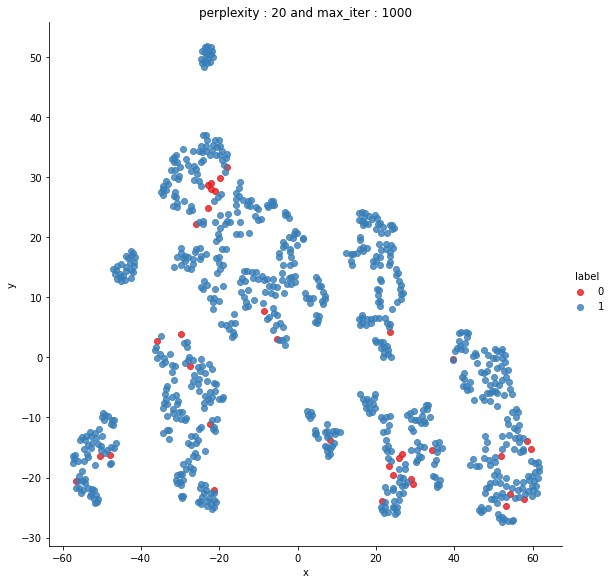

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 879 samples in 0.000s...
[t-SNE] Computed neighbors for 879 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 879 / 879
[t-SNE] Mean sigma: 4.070869
[t-SNE] Computed conditional probabilities in 0.043s
[t-SNE] Iteration 50: error = 56.6900406, gradient norm = 0.2673835 (50 iterations in 0.181s)
[t-SNE] Iteration 100: error = 53.0338783, gradient norm = 0.2175833 (50 iterations in 0.182s)
[t-SNE] Iteration 150: error = 52.8130760, gradient norm = 0.2175291 (50 iterations in 0.187s)
[t-SNE] Iteration 200: error = 52.7953873, gradient norm = 0.2171057 (50 iterations in 0.165s)
[t-SNE] Iteration 250: error = 52.8400879, gradient norm = 0.2212328 (50 iterations in 0.183s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.840088
[t-SNE] Iteration 300: error = 0.3780311, gradient norm = 0.0003842 (50 iterations in 0.1

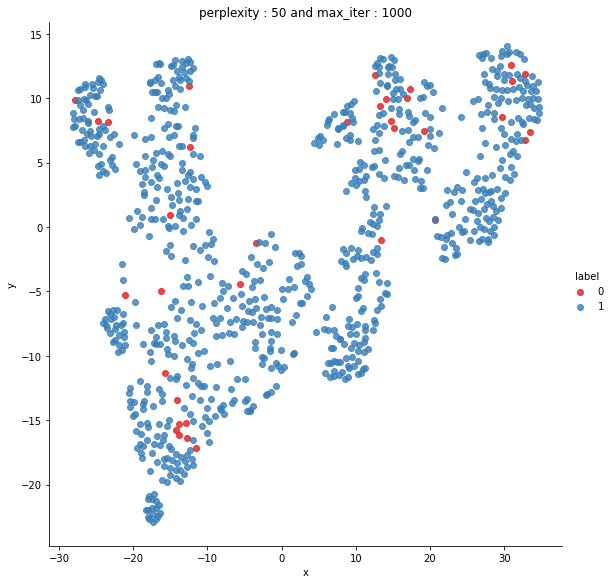

Done


In [281]:
perform_tsne(X2,y2,perplexities =[2,5,10,20,50])

In [282]:
np.unique(y2, return_counts=True)

(array([0, 1]), array([ 35, 844]))

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=100)

In [284]:
X_train.shape

(615, 2)

##### I modelli vengono sviluppati considerando la riduzione eseguita con t-SNE

## Decision Tree before Undersampling/Oversampling

In [285]:
from scipy.stats import loguniform

rvs = loguniform.rvs(1e-2, 1e0, size=1000)

In [286]:
import scipy as sp
sp.random.seed(123345) 
x=sp.random.uniform(low=0.001,high=0.2,size=10)

In [287]:
def Decision_tree(X_train_array, y_train_array,N):
    
    param_dist = {'max_depth': list(range(2,N)),
              'min_samples_split': rvs,
              'min_samples_leaf': x,
              "criterion": ["gini", "entropy"]}


    tree = DecisionTreeClassifier(random_state=42)


    tree_cv = RandomizedSearchCV(tree, param_dist, cv=10, random_state=42)


    tree_cv.fit(X_train_array,y_train_array)

    return tree_cv

In [288]:
decision_tree = Decision_tree(x_train, y_train,615)

In [289]:
print("Tuned Decision Tree Parameters: {}".format(decision_tree.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 0.06780834322408842, 'min_samples_leaf': 0.15207238355939207, 'max_depth': 31, 'criterion': 'entropy'}


In [290]:
y_pred_decision_tree = decision_tree.predict(X_test)

In [291]:
def metrics_model( model_name,predict, test):
    new_dic = {model_name:{}}
    new_dic[model_name]['accuracy'] = f1_score(predict, test)
    new_dic[model_name]['precision'] = precision_score(predict, test)
    new_dic[model_name]['recall'] = recall_score(predict, test)
    new_dic[model_name]['f1_score'] = f1_score(predict, test)
    
    return new_dic

In [292]:
metrics_model('decision_tree',y_pred_decision_tree, y_test)

{'decision_tree': {'accuracy': 0.9826589595375723,
  'precision': 1.0,
  'recall': 0.9659090909090909,
  'f1_score': 0.9826589595375723}}

In [293]:
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.97      1.00      0.98       255

    accuracy                           0.97       264
   macro avg       0.48      0.50      0.49       264
weighted avg       0.93      0.97      0.95       264



## KNN before Undersampling/Oversampling

In [294]:
def spearman_selector(target, df, k):
    """Returns a df comprising all the features highly correlated (above k and below -k)
    with the binary target according Spearman coefficient. Target must be a pd Series"""
    df = df.select_dtypes(include="number")
    target = target.map({target.unique()[0]:0, target.unique()[1]:1})
    new_df = pd.DataFrame()
    for col in df:
        spearman = stats.spearmanr(df[col], target)[0]
        if spearman > k or spearman < -k:
            new_df[col] = df[col]
    return new_df

In [295]:
df_emotional_intensity_train = spearman_selector(df_emotional_intensity_train['emotional_intensity'], df_emotional_intensity_train,
                                                 0.4)

In [296]:
dip_indp_variables_knn = dip_indp_variables(df_emotional_intensity_train,"emotional_intensity")

In [297]:
dip_indp_variables_knn['result']

{0: 984, 1: 844}

In [298]:
rows_remove_knn = rows_to_remove(df_emotional_intensity_train,"emotional_intensity", 35, dip_indp_variables_knn)

In [299]:
drop_rows_knn = drop_rows(df_emotional_intensity_train, rows_remove_knn)

In [300]:
dip_indip_after_remove_knn = dip_indip_after_remove(drop_rows_knn['df_after_remove'], 
                                                'emotional_intensity',
                                                rows_remove_knn['rows_remove'], dip_indp_variables_knn)

In [182]:
X2_knn = np.array(dip_indip_after_remove_knn['X2'])
y2_knn = np.array(dip_indip_after_remove_knn['y2'].ravel())

In [301]:
X2_reduced_knn = perform_tsne_reduced(X2_knn,perplexities =[2,5,10,20,50])


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 879 samples in 0.001s...
[t-SNE] Computed neighbors for 879 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 879 / 879
[t-SNE] Mean sigma: 0.012105
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 97.7077255, gradient norm = 0.4749320 (50 iterations in 0.124s)
[t-SNE] Iteration 100: error = 89.5049362, gradient norm = 0.4725467 (50 iterations in 0.091s)
[t-SNE] Iteration 150: error = 83.1158829, gradient norm = 0.4853816 (50 iterations in 0.082s)
[t-SNE] Iteration 200: error = 80.4450531, gradient norm = 0.4781522 (50 iterations in 0.084s)
[t-SNE] Iteration 250: error = 79.6973572, gradient norm = 0.4763418 (50 iterations in 0.099s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.697357
[t-SNE] Iteration 300: error = 1.6415653, gradient norm = 0.0064141 (50 iterations in 0.086s)
[t-

[t-SNE] Iteration 450: error = 0.6139205, gradient norm = 0.0001678 (50 iterations in 0.108s)
[t-SNE] Iteration 500: error = 0.6077471, gradient norm = 0.0001566 (50 iterations in 0.122s)
[t-SNE] Iteration 550: error = 0.6035779, gradient norm = 0.0001572 (50 iterations in 0.115s)
[t-SNE] Iteration 600: error = 0.6010455, gradient norm = 0.0001316 (50 iterations in 0.104s)
[t-SNE] Iteration 650: error = 0.5993636, gradient norm = 0.0001212 (50 iterations in 0.119s)
[t-SNE] Iteration 700: error = 0.5977211, gradient norm = 0.0001129 (50 iterations in 0.108s)
[t-SNE] Iteration 750: error = 0.5965325, gradient norm = 0.0001046 (50 iterations in 0.112s)
[t-SNE] Iteration 800: error = 0.5953652, gradient norm = 0.0001065 (50 iterations in 0.104s)
[t-SNE] Iteration 850: error = 0.5941840, gradient norm = 0.0001051 (50 iterations in 0.127s)
[t-SNE] Iteration 900: error = 0.5931342, gradient norm = 0.0001077 (50 iterations in 0.113s)
[t-SNE] Iteration 950: error = 0.5925212, gradient norm = 0.

In [302]:
X2_knn = X2_reduced_knn['X_reduced']

In [303]:
np.unique(y2_knn, return_counts=True)

(array([0, 1]), array([ 35, 844]))

In [304]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X2_knn, y2_knn, test_size=0.3, random_state=100)

In [305]:
X_train_knn.shape

(615, 2)

In [357]:
def Knn(X_train_array, y_train_array,N):   #N è il numero di samples in training test
    
    knn = KNeighborsClassifier()
    
    parameters = {
        'n_neighbors': list(range(2, ceil(N/2),10)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'cityblock', 'cosine','chebyshev']
        }
    
    knn_cv = RandomizedSearchCV(knn,
                     parameters,
                     cv=10,
                    random_state = 42)
    
    knn_cv.fit(X_train_array, y_train_array)
    
    return knn_cv

In [358]:
knn = Knn(X_train_knn, y_train_knn, 615)

In [359]:
print(knn.best_params_)

{'weights': 'distance', 'n_neighbors': 162, 'metric': 'euclidean'}


In [360]:
y_pred_knn = knn.predict(X_test_knn)

In [361]:
print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.97      1.00      0.98       255

    accuracy                           0.97       264
   macro avg       0.48      0.50      0.49       264
weighted avg       0.93      0.97      0.95       264



In [362]:
metrics_model('knn',y_pred_knn, y_test_knn)

{'knn': {'accuracy': 0.9826589595375723,
  'precision': 1.0,
  'recall': 0.9659090909090909,
  'f1_score': 0.9826589595375723}}

## Undersampling

In [363]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours

In [364]:
def randomUnderSampler(X_train_array, y_train_array):
    
    
    rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
    
    X_res_rus, y_res_rus = rus.fit_resample(X_train_array, y_train_array)
    
    return X_res_rus, y_res_rus

In [365]:
X_res_rus, y_res_rus = randomUnderSampler(X_train, y_train)

In [366]:
X_res_rus_knn, y_res_rus_knn = randomUnderSampler(X_train_knn, y_train_knn)

In [367]:
print('Resampled dataset shape %s' % Counter(y_res_rus))

Resampled dataset shape Counter({0: 26, 1: 26})


In [368]:
print('Resampled dataset shape %s' % Counter(y_res_rus_knn))

Resampled dataset shape Counter({0: 26, 1: 26})


## KNN after RandomUndersampling

In [369]:
knn_under_rus = Knn(X_res_rus_knn, y_res_rus_knn, 52)

In [370]:
print(knn_under_rus.best_params_)

{'weights': 'uniform', 'n_neighbors': 12, 'metric': 'cityblock'}


In [371]:
y_pred_knn_under_rus = knn_under_rus.predict(X_test_knn)

In [372]:
metrics_model('Knn RandomUndersampling',y_pred_knn_under_rus, y_test_knn)

{'Knn RandomUndersampling': {'accuracy': 0.6989795918367347,
  'precision': 0.5372549019607843,
  'recall': 1.0,
  'f1_score': 0.6989795918367347}}

## Decision Tree after RandomUndersampling

In [373]:
decision_tree_under_rus = Decision_tree(X_res_rus, y_res_rus, 52)

In [374]:
print("Tuned Decision Tree Parameters: {}".format(decision_tree_under_rus.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 0.5631321383131923, 'min_samples_leaf': 0.04035790659541334, 'max_depth': 15, 'criterion': 'gini'}


In [375]:
y_pred_decision_tree_under_rus = decision_tree_under_rus.predict(X_test)

In [376]:
metrics_model('decision_tree RandomUndersampling',y_pred_decision_tree_under_rus, y_test)

{'decision_tree RandomUndersampling': {'accuracy': 0.6276595744680852,
  'precision': 0.4627450980392157,
  'recall': 0.9752066115702479,
  'f1_score': 0.6276595744680852}}

In [377]:
print(classification_report( y_pred_decision_tree_under_rus, y_test))

              precision    recall  f1-score   support

           0       0.67      0.04      0.08       143
           1       0.46      0.98      0.63       121

    accuracy                           0.47       264
   macro avg       0.56      0.51      0.35       264
weighted avg       0.57      0.47      0.33       264



## EditedNearestNeighbors

In [378]:
def enn(X_train_array, y_train_array):
    
    enn = EditedNearestNeighbours()
    
    X_res_enn, y_res_enn = enn.fit_resample(X_train_array, y_train_array)
    
    return X_res_enn, y_res_enn

In [379]:
X_res_enn, y_res_enn = enn(X_train, y_train)

In [380]:
X_res_enn_knn, y_res_enn_knn = enn(X_train_knn, y_train_knn)

In [381]:
print('Resampled dataset shape %s' % Counter(y_res_enn))

Resampled dataset shape Counter({1: 535, 0: 26})


In [382]:
print('Resampled dataset shape %s' % Counter(y_res_enn_knn))

Resampled dataset shape Counter({1: 521, 0: 26})


## KNN after EditedNearestneighbors

In [383]:
knn_under_enn = Knn(X_res_enn_knn, y_res_enn_knn, 532)

In [384]:
print(knn_under_enn.best_params_)

{'weights': 'distance', 'n_neighbors': 192, 'metric': 'chebyshev'}


In [385]:
y_pred_knn_under_enn = knn_under_enn.predict(X_test_knn)

In [386]:
metrics_model('knn EditedNearestNeighbors',y_pred_knn_under_enn, y_test_knn)

{'knn EditedNearestNeighbors': {'accuracy': 0.9826589595375723,
  'precision': 1.0,
  'recall': 0.9659090909090909,
  'f1_score': 0.9826589595375723}}

In [387]:
print(classification_report( y_pred_knn_under_enn, y_test_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98       264

    accuracy                           0.97       264
   macro avg       0.50      0.48      0.49       264
weighted avg       1.00      0.97      0.98       264



## Decision Tree after EditedNearestNeighbors

In [388]:
decision_tree_under_enn = Decision_tree(X_res_enn, y_res_enn, 532)

In [389]:
print("Tuned Decision Tree Parameters: {}".format(decision_tree_under_enn.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 0.06780834322408842, 'min_samples_leaf': 0.15207238355939207, 'max_depth': 114, 'criterion': 'entropy'}


In [390]:
y_pred_decision_tree_under_enn = decision_tree_under_enn.predict(X_test)

In [391]:
metrics_model('decision_tree EditedNearestNeighbors',y_pred_decision_tree_under_enn, y_test)

{'decision_tree EditedNearestNeighbors': {'accuracy': 0.9826589595375723,
  'precision': 1.0,
  'recall': 0.9659090909090909,
  'f1_score': 0.9826589595375723}}

In [392]:
print(classification_report(y_test, y_pred_decision_tree_under_enn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.97      1.00      0.98       255

    accuracy                           0.97       264
   macro avg       0.48      0.50      0.49       264
weighted avg       0.93      0.97      0.95       264



## SMOTE

In [393]:
from imblearn.over_sampling import SMOTE

In [394]:
def smote(X_train_array, y_train_array):
    
    sm = SMOTE(random_state=42)
    
    X_res_sm, y_res_sm = sm.fit_resample(X_train_array, y_train_array)
    
    return X_res_sm, y_res_sm

In [395]:
X_res_sm, y_res_sm = smote(X_train, y_train)

In [396]:
X_res_sm_knn, y_res_sm_knn = smote(X_train_knn, y_train_knn)

In [397]:
print('Resampled dataset shape %s' % Counter(y_res_sm))

Resampled dataset shape Counter({1: 589, 0: 589})


In [398]:
print('Resampled dataset shape %s' % Counter(y_res_sm_knn))

Resampled dataset shape Counter({1: 589, 0: 589})


## KNN after SMOTE

In [399]:
knn_over_sm = Knn(X_res_sm_knn, y_res_sm_knn, 1169)

In [400]:
print(knn_over_sm.best_params_)

{'weights': 'distance', 'n_neighbors': 42, 'metric': 'euclidean'}


In [401]:
y_pred_knn_over_sm = knn_over_sm.predict(X_test_knn)

In [402]:
metrics_model('knn SMOTE',y_pred_knn_over_sm, y_test_knn)

{'knn SMOTE': {'accuracy': 0.8227272727272728,
  'precision': 0.7098039215686275,
  'recall': 0.9783783783783784,
  'f1_score': 0.8227272727272728}}

## Decision Tree after SMOTE

In [403]:
decision_tree_over_sm = Decision_tree(X_res_sm, y_res_sm, 1169)

In [404]:
print("Tuned Decision Tree Parameters: {}".format(decision_tree_over_sm.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 0.05714043333709257, 'min_samples_leaf': 0.04035790659541334, 'max_depth': 943, 'criterion': 'entropy'}


In [405]:
y_pred_decision_tree_over_sm = decision_tree_over_sm.predict(X_test)

In [406]:
metrics_model('decision_tree SMOTE',y_pred_decision_tree_over_sm, y_test)

{'decision_tree SMOTE': {'accuracy': 0.8208616780045351,
  'precision': 0.7098039215686275,
  'recall': 0.9731182795698925,
  'f1_score': 0.8208616780045351}}

In [407]:
print(classification_report(y_test, y_pred_decision_tree_over_sm))

              precision    recall  f1-score   support

           0       0.05      0.44      0.09         9
           1       0.97      0.71      0.82       255

    accuracy                           0.70       264
   macro avg       0.51      0.58      0.46       264
weighted avg       0.94      0.70      0.80       264

